# 추천 시스템
***
1. 인구 통계학적 기반의 추천
    - 많은 사람들이 좋아하는 영화, 평점이 높은 영화 
2. 컨텐츠 기반의 추천
    - 사용자의 취향에 따라서 추천
3. 협업 기반
    - 관심이 있는 영화와 연관성 점수를 메겨 추천

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 인구 통계학적 필터링

In [2]:
df1 = pd.read_csv('./tmdb_5000_credits.csv')
df2 = pd.read_csv('./tmdb_5000_movies.csv')

In [3]:
df1.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [4]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [5]:
df1.shape, df2.shape

((4803, 4), (4803, 20))

### 데이터프레임 연결

- df1의 movie_id와 df2의 id 두 개를 이용
- title 컬럼이 중복되어있기 때문에 한 개의 컬럼 제거 필요

In [6]:
temp_df1 = df1.rename(columns={"movie_id":"id"}).drop(columns='title')

In [7]:
df2 = df2.merge(temp_df1, on="id")

In [8]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### 영화 추천 점수 공식

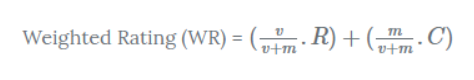

- v : 영화 vote 숫자
- m : vote_count 수 ( 최소 투표 수 )
- R : 영화의 평균 평점
- C : 전체 영화의 vote_average 평균

In [9]:
C = df2['vote_average'].mean()
C

6.092171559442011

In [10]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [11]:
# m 보다 큰 vote_count를 갖는 데이터 추출
q_movies = df2[df2['vote_count'] >= m]

In [12]:
q_movies.shape

(481, 22)

In [13]:
# 추천 공식 함수
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    
    return (v / (v+m) * R) + (m / (m+v) * C)

In [14]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18540\3735737523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_movies['score'] = q_movies.apply(weighted_rating, axis=1)


In [15]:
q_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368


In [16]:
q_movies.sort_values('score', ascending=False, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18540\182113279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_movies.sort_values('score', ascending=False, inplace=True)


In [17]:
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


In [18]:
pop = df2.sort_values('popularity', ascending=False)

In [19]:
pop[['title', 'vote_count', 'vote_average', 'popularity']].head(10)

,title,vote_count,vote_average,popularity
546,Minions,4571,6.4,875.581305
95,Interstellar,10867,8.1,724.247784
788,Deadpool,10995,7.4,514.569956
94,Guardians of the Galaxy,9742,7.9,481.098624
127,Mad Max: Fury Road,9427,7.2,434.278564
28,Jurassic World,8662,6.5,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,6985,7.5,271.972889
82,Dawn of the Planet of the Apes,4410,7.3,243.791743
200,The Hunger Games: Mockingjay - Part 1,5584,6.6,206.227151
88,Big Hero 6,6135,7.8,203.734590


## 컨텐츠 기반 필터링
1. 줄거리기반
2. 다양한 요소 (장르, 감독, 출연배우; ... ) 기반

In [20]:
df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

#### Bag of Words(BOW)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# stop_words : 불필요한 단어 제거
tfidf = TfidfVectorizer(stop_words='english')

In [22]:
df2['overview'] = df2['overview'].fillna('')

In [23]:
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

#### 코사인유사도 계산

In [24]:
from sklearn.metrics.pairwise import linear_kernel

In [25]:
cosine_sm = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sm

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

In [26]:
cosine_sm.shape

(4803, 4803)

#### 영화 제목을 통해서 인덱스 찾기 

In [27]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

#### 영화제목을 입력받은 후, 코사인 유사도를 통해 유사한 영화 찾기

In [28]:
# Avatar 영화의 코사인 유사도
test_sim_scores = list(enumerate(cosine_sm[0]))
test_sim_scores

[(0, 1.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0249951158376727),
 (4, 0.0),
 (5, 0.0303525438443129),
 (6, 0.0),
 (7, 0.03758069690343087),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.01978766288618951),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0349695829781853),
 (27, 0.04705452709989043),
 (28, 0.0),
 (29, 0.02518543163480529),
 (30, 0.0),
 (31, 0.06153392877569968),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.07454624070840556),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.021794850562028286),
 (44, 0.0),
 (45, 0.0611498614502933),
 (46, 0.0),
 (47, 0.03398446515527808),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68,

In [29]:
# Avatar 영화와 유사한 영화 추출

test_sim_scores = sorted(test_sim_scores, key=lambda x:x[1], reverse=True)
test_sim_scores[1:11]

[(3604, 0.18681001056212054),
 (2130, 0.17015105119162663),
 (634, 0.13230696630317224),
 (1341, 0.12393264590871879),
 (529, 0.12248959164893028),
 (1610, 0.10469903037615635),
 (311, 0.10091388184065117),
 (847, 0.09799623121705058),
 (775, 0.09447938436890335),
 (2628, 0.09313854469530522)]

- 3604, 2130 ... 등의 영화들이 아바타 영화와 줄거리가 비슷함

In [30]:
# 영화 인덱스 수집
test_movie_indicies = [ i[0] for i in test_sim_scores[1:11] ]

In [31]:
df2['title'].iloc[test_movie_indicies]

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object

#### 작업 함수로 작성

In [32]:
def get_recommendations(title, cosine_sm=cosine_sm):
    # 타이틀을 통해 인덱스 얻어오기
    idx = indices[title]
    # idx 를 통해 코사인 유사도 매트릭스에서 (idx, 유사도) 가져오기
    sim_scores = list(enumerate(cosine_sm[idx]))
    # 정렬
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    # 10개의 영화 인덱스 추출
    movie_indicies = [ i[0] for i in sim_scores ]
    # 10개의 영화 제목 추출
    return df2['title'].iloc[movie_indicies]

In [33]:
get_recommendations('Avengers: Age of Ultron')

16                    The Avengers
79                      Iron Man 2
68                        Iron Man
26      Captain America: Civil War
227                 Knight and Day
31                      Iron Man 3
1868            Cradle 2 the Grave
344                    Unstoppable
1922                    Gettysburg
531        The Man from U.N.C.L.E.
Name: title, dtype: object

#### 다양한 요소(장르, 감독, 키워드) 추천

In [34]:
# Json 데이터를 담고있는 String 형태 ( 변환 필요 )

df2.loc[0, 'genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

***
#### 컬럼의 타입변환

In [35]:
from ast import literal_eval

In [36]:
s1 = [{"id": 28, "name": "Action"}]
s2 = '[{"id": 28, "name": "Action"}]'

print(type(s1), type(s2))

<class 'list'> <class 'str'>


In [37]:
s2 = literal_eval(s2)

print(type(s1), type(s2))

<class 'list'> <class 'list'>


***

In [38]:
features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [39]:
df2.loc[0, 'genres']

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [40]:
df2.loc[0, 'crew']

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

- crew 내 Director 추출

In [41]:
# 감독을 찾으면 이름 반환, 없는 경우 nan
def get_director(x):
    for i in x:
        if i['job'] == "Director":
            return i['name']
    return np.nan

In [42]:
df2['director'] = df2['crew'].apply(get_director)

#### cast, genres, keywords 는 앞의 세개만 추출

In [43]:
df2.loc[0, 'cast']

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [44]:
# 전체를 리스트로 만들어 앞 쪽 세 개만 리턴

def get_list(x):
    if isinstance(x, list): # list 인지 확인
        names = [ i['name'] for i in x ]
        if len(names) > 3:
            names = names[:3]
        return names;
    return []

In [45]:
features = ['cast', 'keywords', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [46]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


#### 데이터 정리
- 대, 소문자가 섞여 있는 부분은 모두 소문자로 변경
- 사람 이름의 경우 중간에 있는 공백 제거

In [47]:
def clean_data(x):
    if isinstance(x, list):
        return [ str.lower(i.replace(' ', '')) for i in x ]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(' ', ''))
        else:
            return ''

In [48]:
features = ['cast', 'keywords', 'genres', 'director']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [49]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]",christophernolan,"[dccomics, crimefighter, terrorist]","[action, crime, drama]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]",andrewstanton,"[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]"


In [53]:
# 각 컬럼의 값들을 하나로 합치기 

def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [54]:
df2['soup'] = df2.apply(create_soup, axis=1)

In [55]:
df2['soup'][0]

'cultureclash future spacewar samworthington zoesaldana sigourneyweaver jamescameron action adventure fantasy'

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words="english")

count_matrix = count.fit_transform(df2['soup'])
count_matrix

<4803x11520 sparse matrix of type '<class 'numpy.int64'>'
	with 42935 stored elements in Compressed Sparse Row format>

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sm2 = cosine_similarity(count_matrix, count_matrix)

In [58]:
cosine_sm2

array([[1. , 0.3, 0.2, ..., 0. , 0. , 0. ],
       [0.3, 1. , 0.2, ..., 0. , 0. , 0. ],
       [0.2, 0.2, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [59]:
indices = pd.Series(df2.index, index=df2['title'])

In [60]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [61]:
get_recommendations('Up', cosine_sm2)

231                                        Monsters, Inc.
1983                                     Meet the Deedles
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
3114                                          Elsa & Fred
1580                                          The Nut Job
3670                                      Running Forever
4709                            A Charlie Brown Christmas
40                                                 Cars 2
42                                            Toy Story 3
77                                             Inside Out
Name: title, dtype: object

#### 웹에서 사용할 파일 내보내기
- pickle 은 파이썬에서 사용하는 특수한 파일 형식이다

In [62]:
import pickle

In [63]:
movies = df2[['id', 'title']].copy()

In [64]:
pickle.dump(movies, open("movies.pickle", 'wb'))

In [65]:
pickle.dump(cosine_sm2, open("cosine_sm2.pickle", 'wb'))